In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
!pip install qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [qiskit]


In [4]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.2 MB/s eta 0:00:00


In [6]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [qiskit-ibm-runtime]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


In [38]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp, Statevector

In [22]:
#importing backend and noise models

backend = FakeSherbrooke()
noise_model = NoiseModel.from_backend(backend)
basis_gates = NoiseModel.basis_gates

ideal_sim = AerSimulator()
noisy_sim = AerSimulator(noise_model = noise_model)


In [41]:
#two-spin system at time t

def two_spin_circuit_at_t(t, measured):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.rxx(2 * t, 0, 1)
    qc.ryy(2 * t, 0, 1)
    qc.rzz(2 * t, 0, 1)
    if measured == True:
      qc.measure_all()
    return qc

In [29]:
#applying an observable onto the system
Z0Z1 = SparsePauliOp.from_list([("ZZ", 1)])

In [25]:
#making a function to calculate fidelity, using the Bhattacharya method
#ideal counts is the dictionary of probability distributions corresponding to the output given by the ideal simlulator,noisy counts is the one by the noisy simulator

def computing_fidelity(ideal_counts, noisy_counts, shots):
    all_keys = sorted(set(ideal_counts.keys()).union(noisy_counts.keys())) #finding union all possible outcomes
    p1 = np.array([ideal_counts.get(k, 0)/shots for k in all_keys]) #
    p2 = np.array([noisy_counts.get(k, 0)/shots for k in all_keys])
    fidelity = np.sum(np.sqrt(p1 * p2))**2
    return fidelity


In [52]:
time_list = [i for i in range(0,31)]
fidelity_list = []
obs_ideal = []
obs_noisy = []
shots = 1024

#calculating fidelities without applying any operator
for t in time_list:
    qc = two_spin_circuit_at_t(t, True)
    qc_transpiled = transpile(qc, backend)

    # Ideal run
    result_ideal = ideal_sim.run(qc_transpiled, shots=shots).result()
    counts_ideal = result_ideal.get_counts()

    # Noisy run
    result_noisy = noisy_sim.run(qc_transpiled, shots=shots).result()
    counts_noisy = result_noisy.get_counts()
    fidelity = computing_fidelity(counts_ideal, counts_noisy, shots)
    fidelity_list.append(fidelity)


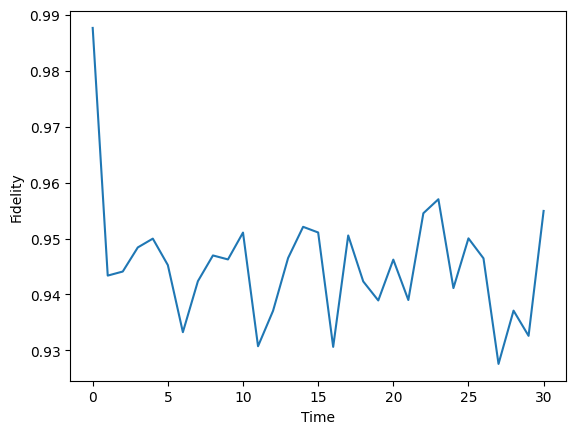

In [53]:
plt.plot(time_list, fidelity_list, label="Fidelities")
plt.xlabel("Time")
plt.ylabel("Fidelity")
plt.show()